##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# Number of unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Number of classes: 10


In [3]:
# Define class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

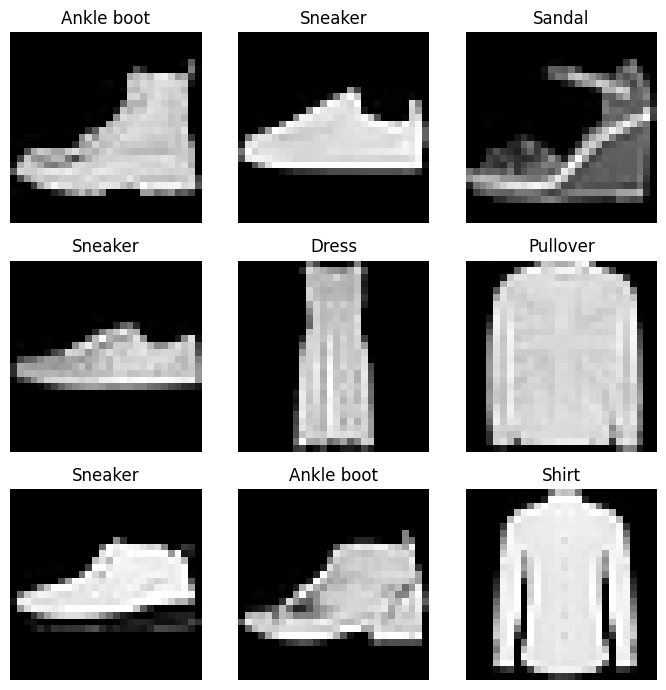

In [4]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(7, 7))
indices = np.random.choice(len(x_train), 9, replace=False)

for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(class_names[y_train[idx]])
    plt.axis("off")

plt.tight_layout()
plt.show()

0 - T-shirt/top: 6000
1 - Trouser: 6000
2 - Pullover: 6000
3 - Dress: 6000
4 - Coat: 6000
5 - Sandal: 6000
6 - Shirt: 6000
7 - Sneaker: 6000
8 - Bag: 6000
9 - Ankle boot: 6000


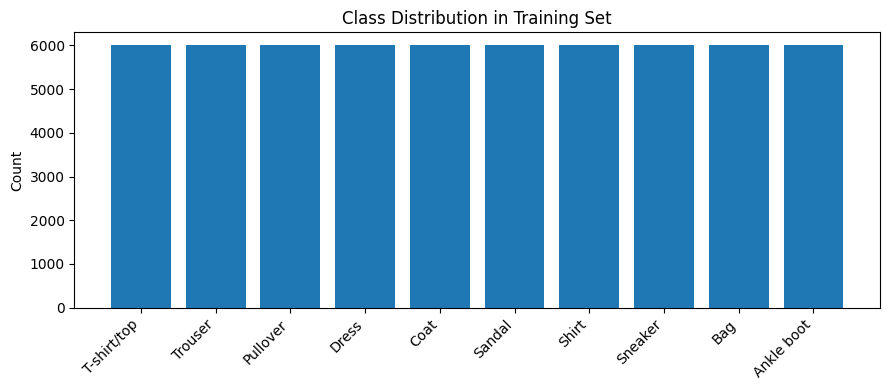

In [6]:
# Count occurrences of each class in the training set
counts = np.bincount(y_train, minlength=10)

for i, c in enumerate(counts):
    print(f"{i} - {class_names[i]}: {c}")

# Plot the class distribution
plt.figure(figsize=(9, 4))
plt.bar(range(10), counts)
plt.xticks(range(10), class_names, rotation=45, ha="right")
plt.ylabel("Count")
plt.title("Class Distribution in Training Set")
plt.tight_layout()
plt.show()

### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Normalize pixel values for x_train and x_test
x_train_norm = x_train.astype("float32") / 255.0
x_test_norm  = x_test.astype("float32") / 255.0

# Add channel dimension: (28, 28) -> (28, 28, 1)
x_train_norm = x_train_norm[..., np.newaxis]
x_test_norm  = x_test_norm[..., np.newaxis]

print("x_train_norm:", x_train_norm.shape)
print("x_test_norm:", x_test_norm.shape)

# Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# Train the model
history = model.fit(
    x_train_norm, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Evaluate the model

x_train_norm: (60000, 28, 28, 1)
x_test_norm: (10000, 28, 28, 1)


c:\Users\96650\anaconda3\envs\cv_lab\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7872 - loss: 0.5804 - val_accuracy: 0.8600 - val_loss: 0.3876
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8651 - loss: 0.3703 - val_accuracy: 0.8800 - val_loss: 0.3235
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8817 - loss: 0.3205 - val_accuracy: 0.8855 - val_loss: 0.3023
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8946 - loss: 0.2884 - val_accuracy: 0.9021 - val_loss: 0.2714
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9027 - loss: 0.2633 - val_accuracy: 0.9013 - val_loss: 0.2646
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9096 - loss: 0.2438 - val_accuracy: 0.9047 - val_loss: 0.2546
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9152 - loss: 0.2277 - val_accuracy: 0.9109 - val_loss: 0.2438
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9214 - loss: 0.2112 - val